In [1]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import cm

## Question and problem definition

The dataset provides nearly 12 years of crime reports from across all of San Francisco's neighborhoods. Given time and location, you must predict the category of crime that occurred.

## Exploratory analysis

In [2]:
train_df = pd.read_csv('C:/Users/angel/Desktop/train.csv')
test_df = pd.read_csv('C:/Users/angel/Desktop/test.csv')
combine = [train_df, test_df]

#### Which features are avaible in the dataset?

In [3]:
print(train_df.columns.values)

['Dates' 'Category' 'Descript' 'DayOfWeek' 'PdDistrict' 'Resolution'
 'Address' 'X' 'Y']


More specifically it includes the following variables:

- Dates - timestamp of the crime incident

- Category - category of the crime incident. (This is our target variable.)

- Descript - detailed description of the crime incident

- DayOfWeek - the day of the week

- PdDistrict - the name of the Police Department District

- Resolution - The resolution of the crime incident

- Address - the approximate street address of the crime incident

- X - Longitude

- Y - Latitude


#### Which features are categorical? Which features are numerical?

In [4]:
train_df.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [5]:
test_df.head()

,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051
1,1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432
2,2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212
3,3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
4,4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412


#### What are the data types for various features?


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
Dates         878049 non-null object
Category      878049 non-null object
Descript      878049 non-null object
DayOfWeek     878049 non-null object
PdDistrict    878049 non-null object
Resolution    878049 non-null object
Address       878049 non-null object
X             878049 non-null float64
Y             878049 non-null float64
dtypes: float64(2), object(7)
memory usage: 60.3+ MB


The dataset contains a lot of 'object' variables (aka strings) that we will need to encode.

#### What is the distribution of the features?

In [7]:
train_df.describe()

,X,Y
count,878049.000000,878049.000000
mean,-122.422616,37.771020
std,0.030354,0.456893
min,-122.513642,37.707879
25%,-122.432952,37.752427
50%,-122.416420,37.775421
75%,-122.406959,37.784369
max,-120.500000,90.000000


In [8]:
train_df.describe(include=['O'])

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address
count,878049,878049,878049,878049,878049,878049,878049
unique,389257,39,879,7,10,17,23228
top,2011-01-01 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Friday,SOUTHERN,NONE,800 Block of BRYANT ST
freq,185,174900,60022,133734,157182,526790,26533


#### Which features contain null or empty values?

In [9]:
train_df.isnull().sum()

Dates         0
Category      0
Descript      0
DayOfWeek     0
PdDistrict    0
Resolution    0
Address       0
X             0
Y             0
dtype: int64

In [10]:
test_df.isnull().sum()

Id            0
Dates         0
DayOfWeek     0
PdDistrict    0
Address       0
X             0
Y             0
dtype: int64

We don't have any nulls in our dataset

#### Single Variable Analysis

Are there any districts that have more crimes than others?

[Text(0, 0, 'SOUTHERN'),
 Text(0, 0, 'MISSION'),
 Text(0, 0, 'NORTHERN'),
 Text(0, 0, 'BAYVIEW'),
 Text(0, 0, 'CENTRAL'),
 Text(0, 0, 'TENDERLOIN'),
 Text(0, 0, 'INGLESIDE'),
 Text(0, 0, 'TARAVAL'),
 Text(0, 0, 'PARK'),
 Text(0, 0, 'RICHMOND')]

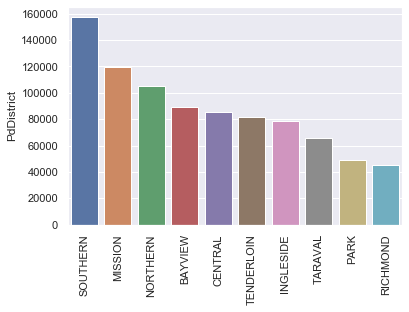

In [11]:
most_dangerous_districts = train_df.PdDistrict.value_counts()
_n_crime_plot = sns.barplot(x=most_dangerous_districts.index,y=most_dangerous_districts)
_n_crime_plot.set_xticklabels(most_dangerous_districts.index,rotation=90)

Clearly, there are differences in the occurrence of crimes through district.

Now let's take a look at the categories of crimes..

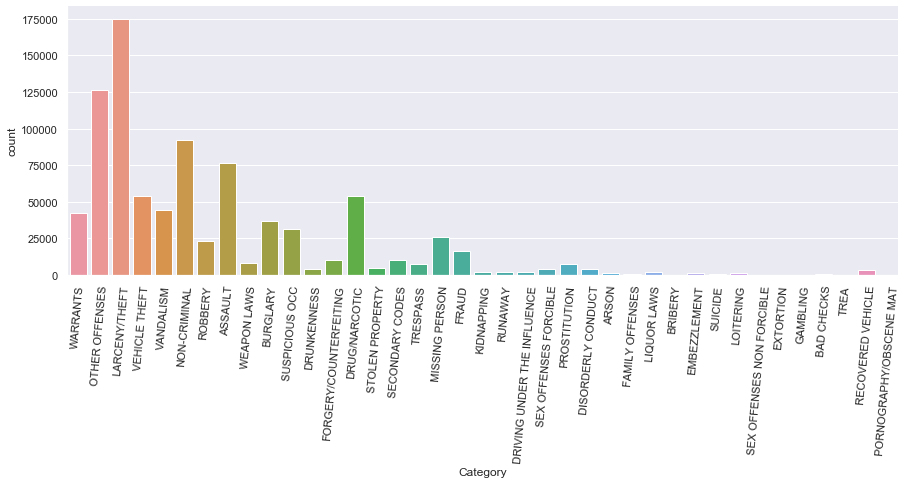

In [12]:
x = sns.catplot('Category', data = train_df, kind = 'count', aspect = 3, height = 4.5)
x.set_xticklabels(rotation = 85)

There are 39 discrete categories that the police department file the incidents, with the most common being Larceny/Theft.

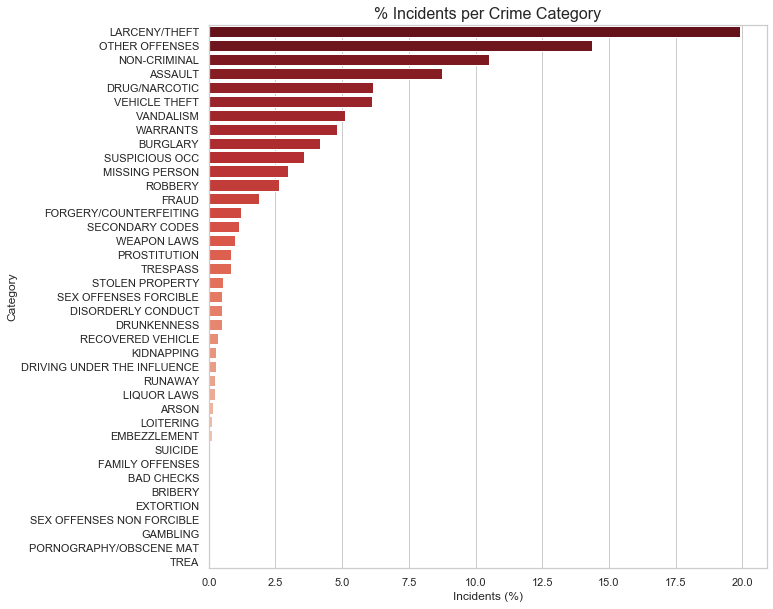

In [13]:
data = train_df.groupby('Category').count().iloc[:, 0].sort_values(
    ascending=False)
plt.figure(figsize=(10, 10))
with sns.axes_style("whitegrid"):
    ax = sns.barplot(
        (data.values / data.values.sum()) * 100,
        data.index,
        orient='h',
        palette="Reds_r")

plt.title('% Incidents per Crime Category', fontdict={'fontsize': 16})
plt.xlabel('Incidents (%)')

plt.show()

What about Dates and Weekday??

Let's first check the format used for the days of week and see how many crimes do we have for each of them.

In [14]:
train_df.DayOfWeek.value_counts()

Friday       133734
Wednesday    129211
Saturday     126810
Thursday     125038
Tuesday      124965
Monday       121584
Sunday       116707
Name: DayOfWeek, dtype: int64

Not so much to say here: the full names of the days are used and it seems that there are no material differences in terms of total number of crimes for each day of the week.

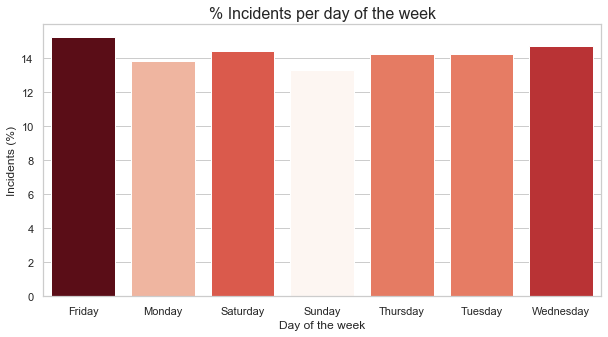

In [15]:
from matplotlib import cm
data = train_df.groupby('DayOfWeek').count().iloc[:, 0]
plt.figure(figsize=(10, 5))
with sns.axes_style("whitegrid"):
    ax = sns.barplot(
        data.index, (data.values / data.values.sum()) * 100,
        orient='v',
        palette=cm.ScalarMappable(cmap='Reds').to_rgba(data.values))

plt.title('% Incidents per day of the week', fontdict={'fontsize': 16})
plt.xlabel('Day of the week')
plt.ylabel('Incidents (%)')

plt.show()

Let's check the format used for the Dates..

In [16]:
train_df.Dates

0         2015-05-13 23:53:00
1         2015-05-13 23:53:00
2         2015-05-13 23:33:00
3         2015-05-13 23:30:00
4         2015-05-13 23:30:00
                 ...         
878044    2003-01-06 00:15:00
878045    2003-01-06 00:01:00
878046    2003-01-06 00:01:00
878047    2003-01-06 00:01:00
878048    2003-01-06 00:01:00
Name: Dates, Length: 878049, dtype: object

It would be appropriate to divide time and date in the train and test set.

For now let's have a look to the number of cases hourly by district..

C:\Users\angel\Anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


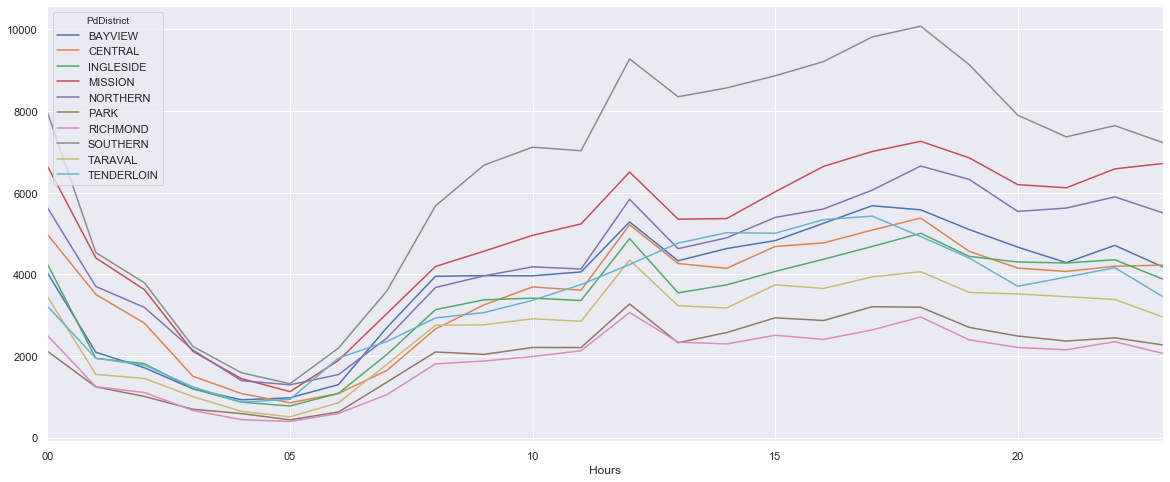

In [17]:
hours = pd.to_datetime(train_df.Dates).dt.strftime('%H')

hourly = train_df[['PdDistrict']]
hourly['Hours'] = hours

hourly = pd.crosstab([hourly.Hours], hourly.PdDistrict).reset_index()
grab_dists = hourly.iloc[:, 1:]
hourly.plot(x='Hours', y=grab_dists.columns, figsize=(20, 8))

As we can see in the graph, the number of crimes fall between midnight and 5:00am for each district and the greatest number of crimes occur around 6:00pm .

In [18]:
data = train_df.groupby('Category').count().iloc[:, 0].sort_values(
    ascending=False)

## Feature Engineering

Splitting Dates in Time and Date for train and test dataframes

In [19]:
train_df['Dates'] = pd.to_datetime(train_df.Dates)
train_df['Times'] = train_df['Dates'].dt.strftime('%H:%M')
train_df.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Times
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,23:53
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,23:53
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,23:33
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,23:30
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,23:30


In [20]:
train_df['Date'] = train_df['Dates'].dt.date
train_df.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Times,Date
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,23:53,2015-05-13
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,23:53,2015-05-13
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,23:33,2015-05-13
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,23:30,2015-05-13
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,23:30,2015-05-13


In [21]:
test_df['Dates'] = pd.to_datetime(test_df.Dates)
test_df['Dates']

0        2015-05-10 23:59:00
1        2015-05-10 23:51:00
2        2015-05-10 23:50:00
3        2015-05-10 23:45:00
4        2015-05-10 23:45:00
                 ...        
884257   2003-01-01 00:01:00
884258   2003-01-01 00:01:00
884259   2003-01-01 00:01:00
884260   2003-01-01 00:01:00
884261   2003-01-01 00:01:00
Name: Dates, Length: 884262, dtype: datetime64[ns]

In [22]:
test_df['Times'] = test_df['Dates'].dt.strftime('%H:%M')
test_df['Date'] = test_df['Dates'].dt.date
test_df.head()

,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y,Times,Date
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051,23:59,2015-05-10
1,1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432,23:51,2015-05-10
2,2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212,23:50,2015-05-10
3,3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412,23:45,2015-05-10
4,4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412,23:45,2015-05-10


In [23]:
train_df = train_df.drop(['Dates'], axis = 1)
test_df = test_df.drop(['Dates'], axis = 1)
combine = [train_df, test_df]

Converting day of the week from string to number

In [24]:
DayOfWeek_mapping = {'Monday':1, 'Tuesday':2, 'Wednesday':3, 'Thursday':4, 'Friday':5, 'Saturday':6, 'Sunday':7}
for dataset in combine:
    dataset['Day_of_Week'] = dataset['DayOfWeek'].map(DayOfWeek_mapping)

In [25]:
train_df = train_df.drop(['DayOfWeek'], axis=1)
test_df = test_df.drop(['DayOfWeek'], axis=1)
combine = [train_df, test_df]

Converting districts into numbers

In [26]:
District_mapping = {'SOUTHERN':1, 'MISSION':2, 'NORTHERN':3, 'BAYVIEW':4, 'CENTRAL':5, 'TENDERLOIN':6, 'INGLESIDE':7, 'TARAVAL':8, 'PARK':9, 'RICHMOND':10}
for dataset in combine:
    dataset['Pd_District'] = dataset['PdDistrict'].map(District_mapping)
    
train_df.drop(['PdDistrict'], axis=1, inplace=True)
test_df.drop(['PdDistrict'], axis=1, inplace=True)


Dropping Resolution and Descript columns, which are just a description of the y categories

In [27]:
train_df.drop(['Resolution'], axis=1, inplace=True)
train_df.drop(['Descript'], axis = 1, inplace=True)

Converting Categories into numbers


In [28]:
unique_categories = list(train_df['Category'].unique())

my_categories = {}

categories_count = 0

for i_category in unique_categories:
    
    categories_count = categories_count + 1
    my_categories[i_category] = categories_count
    
train_df['Category'] = train_df['Category'].map(my_categories)

In [29]:
train_df.head()

,Category,Address,X,Y,Times,Date,Day_of_Week,Pd_District
0,1,OAK ST / LAGUNA ST,-122.425892,37.774599,23:53,2015-05-13,3,3
1,2,OAK ST / LAGUNA ST,-122.425892,37.774599,23:53,2015-05-13,3,3
2,2,VANNESS AV / GREENWICH ST,-122.424363,37.800414,23:33,2015-05-13,3,3
3,3,1500 Block of LOMBARD ST,-122.426995,37.800873,23:30,2015-05-13,3,3
4,3,100 Block of BRODERICK ST,-122.438738,37.771541,23:30,2015-05-13,3,9


Extracting features from Address and creating new columns : Intersection, Block, StreetSuffix

In [30]:
combine = [train_df, test_df]

In [31]:
'longleat house rampayne st'.split(' ')

['longleat', 'house', 'rampayne', 'st']

In [32]:
for dataset in combine:
 dataset['Intersection']=dataset['Address'].apply(lambda x : 1 if '/' in x else 0)
 dataset['Block']=dataset['Address'].apply(lambda x : 1 if 'Block' in x else 0)
 dataset['StreetSuffix']=dataset['Address'].apply(lambda x : x.split(' ')[-1] if len(x.split(' ')[-1])==2 else 0) 


In [33]:
train_df.StreetSuffix.unique()

array(['ST', 'AV', 'WY', 'BL', 'DR', 'CT', 'TR', 'HY', 'RD', 'PZ', 'PL',
       'LN', 0, 'AL', 'CR', 'WK', 'EX', 'RW'], dtype=object)

###### Clustering GPS Coordinates (da vedere se funziona)

In [34]:
from sklearn.cluster import KMeans

# Variable with the Longitude and Latitude
Coordinates=train_df.loc[:,['Address','X','Y']]
Coordinates.head(10)

,Address,X,Y
0,OAK ST / LAGUNA ST,-122.425892,37.774599
1,OAK ST / LAGUNA ST,-122.425892,37.774599
2,VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,1500 Block of LOMBARD ST,-122.426995,37.800873
4,100 Block of BRODERICK ST,-122.438738,37.771541
5,0 Block of TEDDY AV,-122.403252,37.713431
6,AVALON AV / PERU AV,-122.423327,37.725138
7,KIRKWOOD AV / DONAHUE ST,-122.371274,37.727564
8,600 Block of 47TH AV,-122.508194,37.776601
9,JEFFERSON ST / LEAVENWORTH ST,-122.419088,37.807802


When we come to clustering, it’s hard to know how many clusters are optimal…
One method to validate the number of clusters is the elbow method. The idea of the elbow method is to run k-means clustering on the dataset for a range of values of k (say, k from 1 to 10), and for each value of k calculate the Sum of Squared Errors (SSE).
When K increases, the centroids are closer to the clusters centroids. The improvements will decline rapidly at some point, creating the elbow shape. That is the optimal value for K.

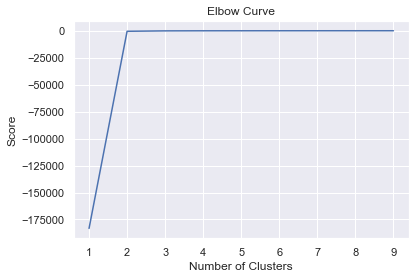

In [35]:
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = train_df[['Y']]
X_axis = train_df[['X']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

When we graph the plot, we see that the graph levels off slowly after 2 clusters. This implies that addition of more clusters will not help us that much.

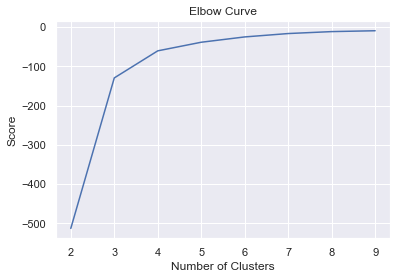

In [43]:
# Visualize
plt.plot(K_clusters[1:], score[1:])
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [44]:
kmeans = KMeans(n_clusters = 4, init ='k-means++')
kmeans.fit(Coordinates[Coordinates.columns[1:3]]) # Compute k-means clustering.
Coordinates['cluster_label'] = kmeans.fit_predict(Coordinates[Coordinates.columns[1:3]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(Coordinates[Coordinates.columns[1:3]]) # Labels of each point
Coordinates.head(10)

,Address,X,Y,cluster_label
0,OAK ST / LAGUNA ST,-122.425892,37.774599,0
1,OAK ST / LAGUNA ST,-122.425892,37.774599,0
2,VANNESS AV / GREENWICH ST,-122.424363,37.800414,0
3,1500 Block of LOMBARD ST,-122.426995,37.800873,0
4,100 Block of BRODERICK ST,-122.438738,37.771541,0
5,0 Block of TEDDY AV,-122.403252,37.713431,3
6,AVALON AV / PERU AV,-122.423327,37.725138,3
7,KIRKWOOD AV / DONAHUE ST,-122.371274,37.727564,3
8,600 Block of 47TH AV,-122.508194,37.776601,2
9,JEFFERSON ST / LEAVENWORTH ST,-122.419088,37.807802,0


In [45]:
print("Cluster memberships:\n{}".format(kmeans.labels_))


Cluster memberships:
[0 0 0 ... 0 0 3]


Let's visualize the coordinates of the cluster centres

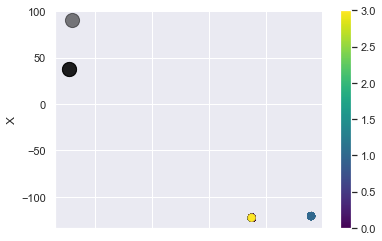

In [46]:
Coordinates.plot.scatter(x = 'Y', y = 'X', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

## Machine learning models

#### Decision Tree